In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle

### Reading pickle files

In [0]:
pickle_off1 = open("drive/My Drive/Nagarro/Assignment 3/testX.pickle","rb")
testX= pickle.load(pickle_off1)

pickle_off2 = open("drive/My Drive/Nagarro/Assignment 3/trainX.pickle","rb")
trainX= pickle.load(pickle_off2)

pickle_off3 = open("drive/My Drive/Nagarro/Assignment 3/trainY.pickle","rb")
trainY= pickle.load(pickle_off3)

In [0]:
import pandas as pd

In [6]:
trainX.shape

(60000, 28, 28)

### The data contains 10 classes, let us look at the first training image of a shoe.

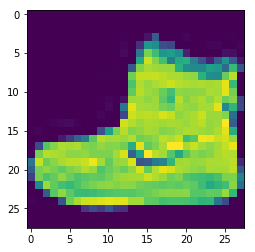

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.imsave('filename.png', np.array(trainX[0]).reshape(28,28), cmap=cm.gray)
plt.imshow(np.array(trainX[0]).reshape(28,28))

### Generally CNN perform better on image datasets, so using the same

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(trainX, trainY, test_size=0.2, random_state=42)


In [0]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
testX = testX.reshape(testX.shape[0], *(28, 28, 1))
X_val = X_val.reshape(X_val.shape[0], *(28, 28, 1))

### Normalising the images

In [0]:

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation, MaxPool2D, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ReduceLROnPlateau


Using TensorFlow backend.


### Defining our model

In [14]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.35))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 10, activation = 'softmax'))
model.summary()

W0623 17:47:19.337706 140404689500032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 17:47:19.375463 140404689500032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 17:47:19.383888 140404689500032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 17:47:19.420523 140404689500032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0623 17:47:19.423272 140404689500032 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
__________

### Plotting the flowchart for our model architecture

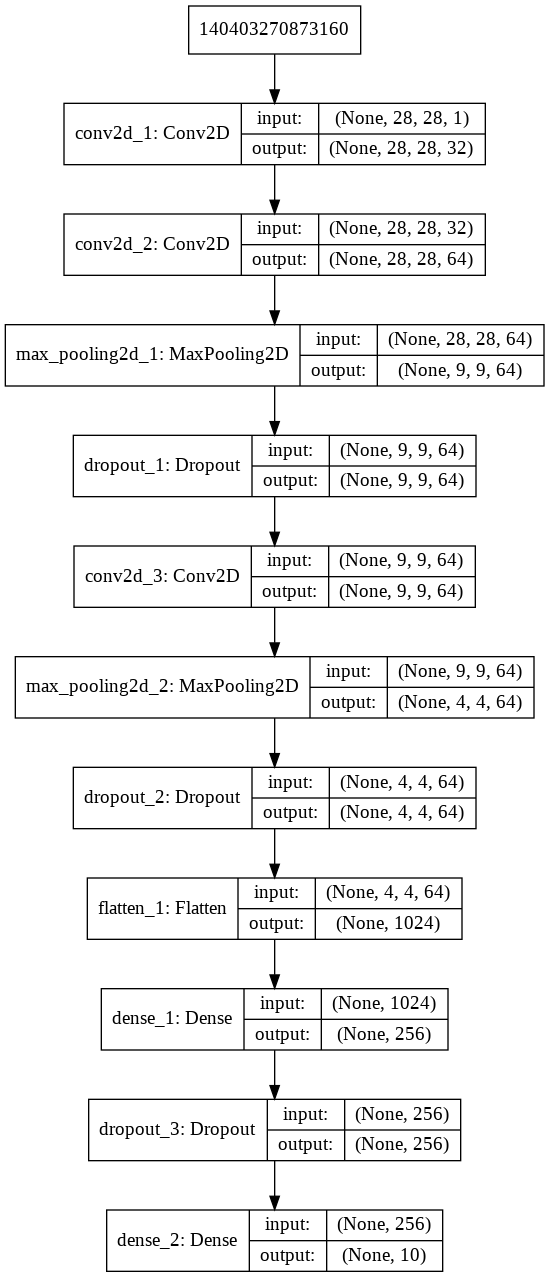

In [15]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='drive/My Drive/Nagarro/Assignment 3/model.png')
from IPython.display import Image
Image(retina=True, filename='drive/My Drive/Nagarro/Assignment 3/model.png')

### Compiling outr model and fitting out training data on it

In [16]:
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=256, epochs=50,verbose=1, validation_data=(X_val, y_val),)

W0623 17:47:22.952963 140404689500032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0623 17:47:22.959905 140404689500032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0623 17:47:23.059780 140404689500032 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 10s 212us/step - loss: 0.7604 - acc: 0.7206 - val_loss: 0.4395 - val_acc: 0.8423
Epoch 2/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.4388 - acc: 0.8395 - val_loss: 0.3424 - val_acc: 0.8747
Epoch 3/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.3698 - acc: 0.8660 - val_loss: 0.3003 - val_acc: 0.8884
Epoch 4/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.3326 - acc: 0.8777 - val_loss: 0.2850 - val_acc: 0.8917
Epoch 5/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.3080 - acc: 0.8864 - val_loss: 0.2621 - val_acc: 0.9038
Epoch 6/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.2900 - acc: 0.8934 - val_loss: 0.2508 - val_acc: 0.9078
Epoch 7/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.2778 - acc: 0.8976 - val_loss: 0.2541 - val_a

### We are getting 93.93% validation accuracy on this model architecture in 50 epochs which is a good enough result

### Plotting the model losses and results graphically

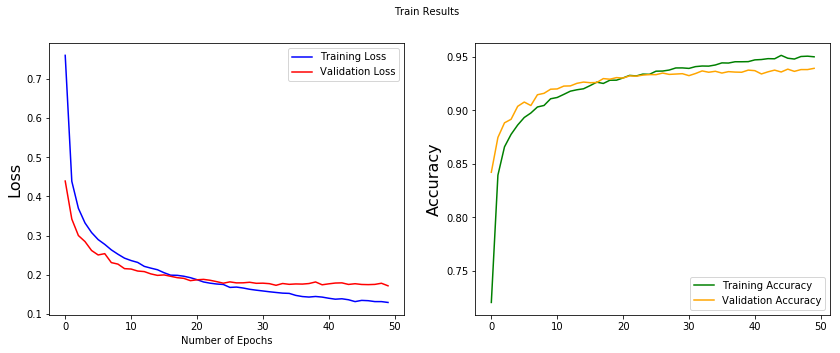

In [17]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], color='green', label='Training Accuracy')
plt.plot(history.history['val_acc'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### Predicting the classes of our testing data and writing them into files

In [0]:

y_pred = model.predict_classes(testX)

In [0]:
pd.DataFrame(y_pred).to_pickle("drive/My Drive/Nagarro/Assignment 3/lastAssignment.pickle")
#y_predto_pickle(y_pred,)

### Saving the model weights to be used in future

In [0]:
model.save("drive/My Drive/Nagarro/Assignment 3/myModel.h5")